In [1]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [2]:
n=100

In [3]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.0192,  1.0000],
        [-0.2683,  1.0000],
        [ 0.7454,  1.0000],
        [ 0.7413,  1.0000],
        [-0.4423,  1.0000]])

In [4]:
doc(tensor)

In [5]:
x[:,0].shape

torch.Size([100])

In [0]:
a = tensor(3.,2); a

tensor([3., 2.])

In [0]:
a.shape

torch.Size([2])

In [0]:
y = x@a + torch.rand(n)

![hani](https://drive.google.com/uc?id=1K6Kx1bTxRdI372dQaUFYn87BiVwRsztk)


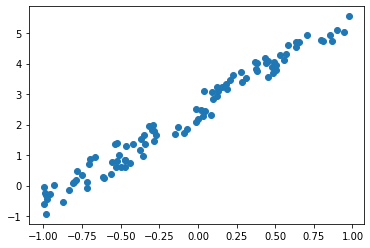

In [0]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [0]:
def mse(y_hat, y):   #ricorda: in entrata nella funzione ho due vettori--> y_hat e y con dimensione [100,1]
  return ((y_hat-y)**2).mean()  #in uscita ho un solo valore!!!

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [0]:
a = tensor(-1.,1)

In [0]:
y_hat = x@a
mse(y_hat, y)

tensor(7.6591)

![Hani](https://drive.google.com/uc?id=1WUhZwj_BI00bVDjzVTs2z8qmCu5AGS56)

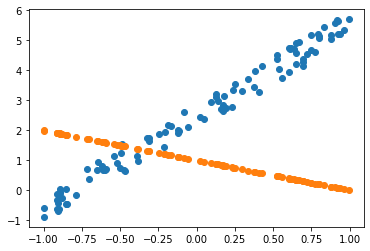

In [0]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [0]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
#per capire come funziona il processo di ottimizzazione in torch: https://towardsdatascience.com/pytorch-autograd-understanding-the-heart-of-pytorchs-magic-2686cd94ec95

def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()  #calculata il vettore delle derivate  della mse ALIAS gradiente ALIAS backforward process ALIAS derivate parziali tramite chain rule
    with torch.no_grad():  #????forse: permette di settare a zero, dopo ogni epoch tutte le informazioni di tutte le variabili che fanno parte della funzione composta (dvLoss/dva)????
        a.sub_(lr * a.grad)
        a.grad.zero_()  #permette di settare a 0 il valore del gradiente (gradiente = dvLoss/dva) dopo ogni epoch

In [0]:
lr = 1e-1
for t in range(100): update()

tensor(9.2781, grad_fn=<MeanBackward0>)
tensor(1.3671, grad_fn=<MeanBackward0>)
tensor(0.3162, grad_fn=<MeanBackward0>)
tensor(0.1188, grad_fn=<MeanBackward0>)
tensor(0.0808, grad_fn=<MeanBackward0>)
tensor(0.0735, grad_fn=<MeanBackward0>)
tensor(0.0720, grad_fn=<MeanBackward0>)
tensor(0.0718, grad_fn=<MeanBackward0>)
tensor(0.0717, grad_fn=<MeanBackward0>)
tensor(0.0717, grad_fn=<MeanBackward0>)


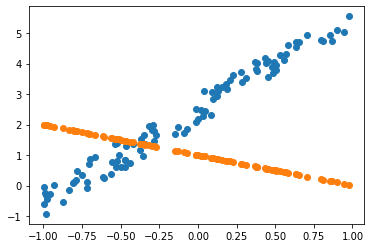

In [0]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

## Animate it!

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [0]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], y_hat)
plt.close()

def animate(i):
    update()
    line.set_ydata(y_hat)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.